In [118]:
import pandas as pd
import numpy as np

In [119]:
df = pd.read_csv('dengue_labels_train.csv')
df.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [120]:
df

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [121]:
df

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [122]:
df.dtypes

city           object
year            int64
weekofyear      int64
total_cases     int64
dtype: object

In [123]:
df['city'] = df['city'].astype('category')

<AxesSubplot:xlabel='total_cases', ylabel='city'>

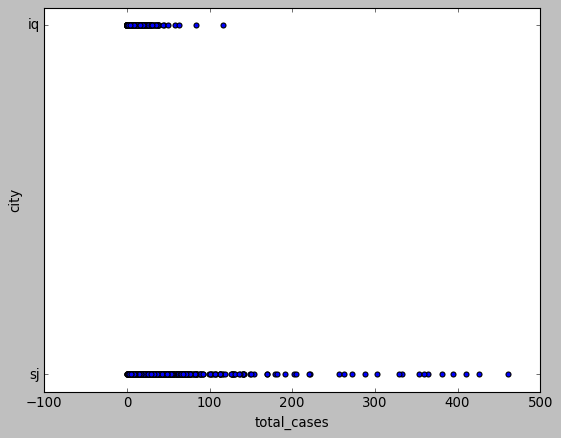

In [124]:
import matplotlib.pyplot as plt
import seaborn as snb
df.plot(kind='scatter', x='total_cases', y='city')

In [125]:
df.dtypes

city           category
year              int64
weekofyear        int64
total_cases       int64
dtype: object

<AxesSubplot:ylabel='Frequency'>

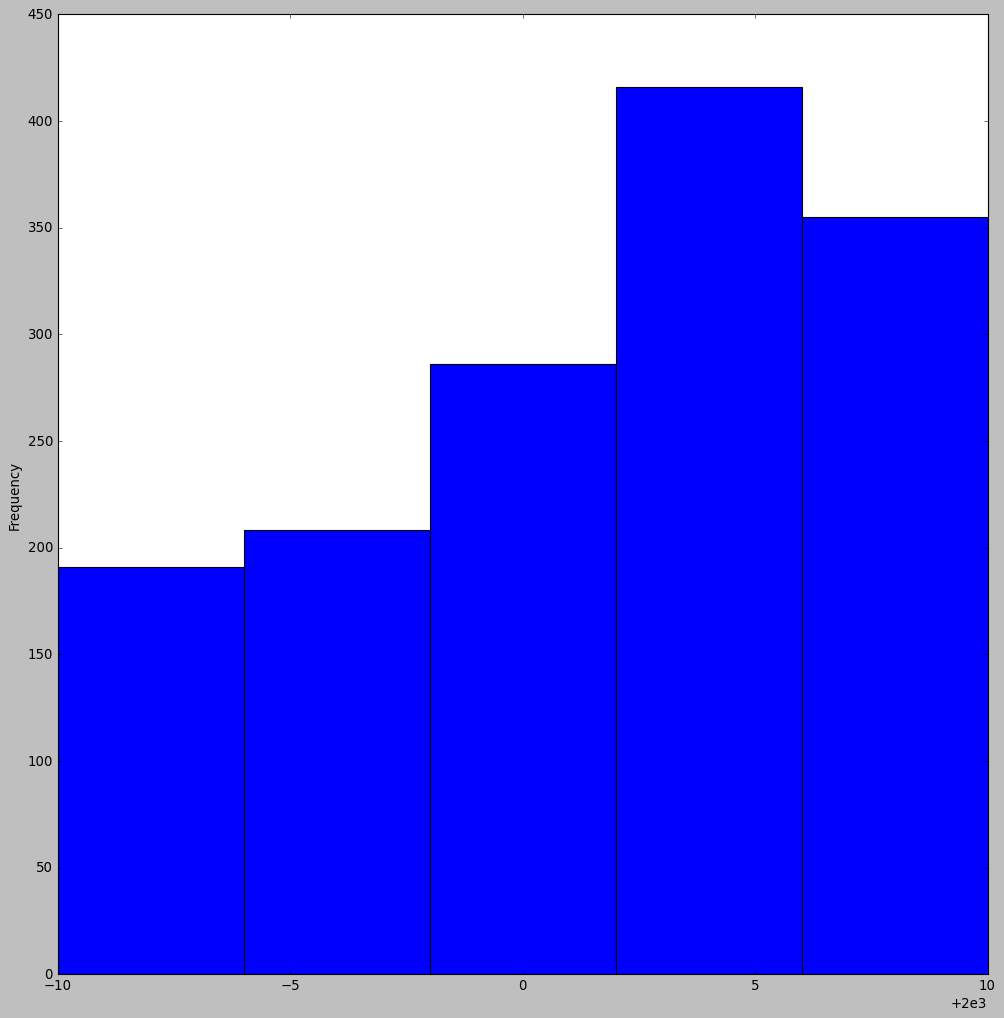

In [126]:
df.year.plot(kind='hist', figsize=(15,15), bins = 5)

<AxesSubplot:>

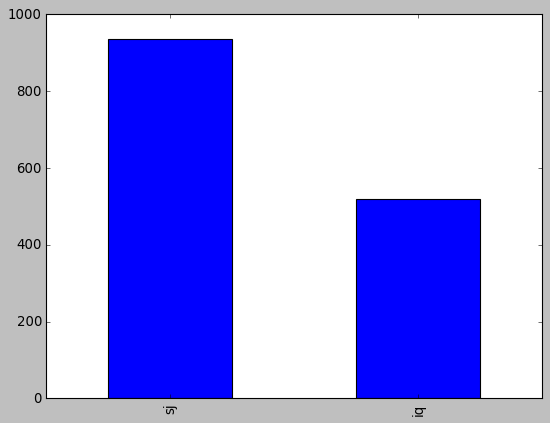

In [127]:
city_cnt = df['city'].value_counts()
plt.style.use('classic')
city_cnt.plot(kind = 'bar')

<AxesSubplot:>

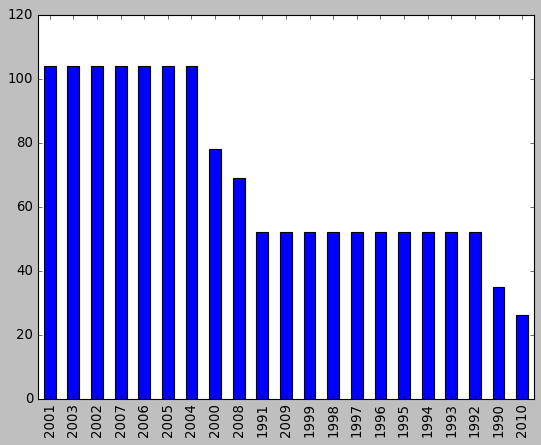

In [128]:
year_cnt = df['year'].value_counts()
plt.style.use('classic')
year_cnt.plot(kind = 'bar')

<AxesSubplot:xlabel='year', ylabel='total_cases'>

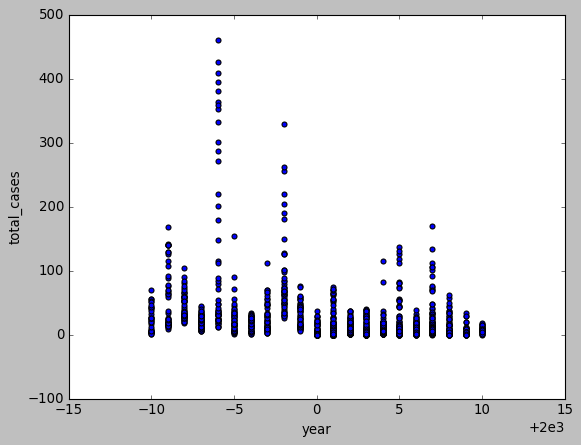

In [129]:
df.plot(kind='scatter', x = 'year', y= 'total_cases')

<AxesSubplot:title={'center':'the citywith the most cases'}, xlabel='city', ylabel='total_cases'>

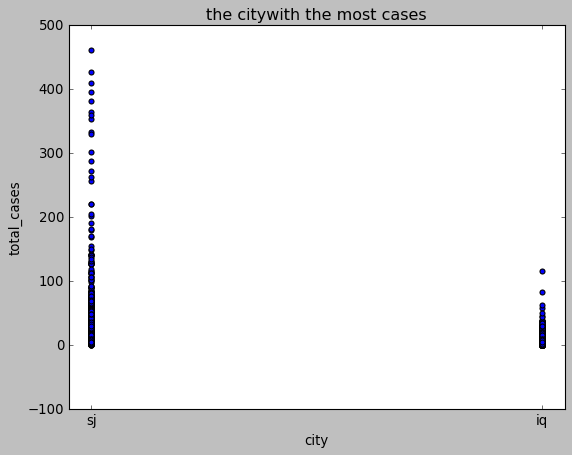

In [130]:
df.plot(kind='scatter', x = 'city', y= 'total_cases', title='the citywith the most cases')

<AxesSubplot:xlabel='weekofyear', ylabel='total_cases'>

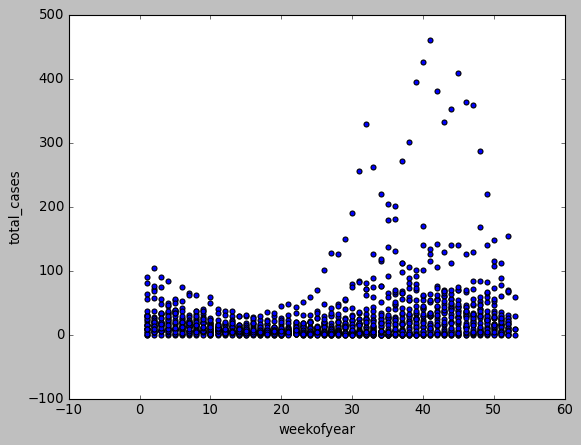

In [131]:
df.plot(kind='scatter', x = 'weekofyear', y= 'total_cases')

In [132]:
df.corr().round(2)

,year,weekofyear,total_cases
year,1.00,-0.07,-0.31
weekofyear,-0.07,1.00,0.22
total_cases,-0.31,0.22,1.00


In [133]:
df['city']

0       sj
1       sj
2       sj
3       sj
4       sj
        ..
1451    iq
1452    iq
1453    iq
1454    iq
1455    iq
Name: city, Length: 1456, dtype: category
Categories (2, object): ['iq', 'sj']

In [134]:
df['city'] = df['city'].map({'iq':'1', 'sj':'0'})

In [135]:
df['city']=df['city'].astype('int')

In [136]:
df['city']

0       0
1       0
2       0
3       0
4       0
       ..
1451    1
1452    1
1453    1
1454    1
1455    1
Name: city, Length: 1456, dtype: int64

In [137]:
df.dtypes

city           int64
year           int64
weekofyear     int64
total_cases    int64
dtype: object

In [138]:
df.corr()

,city,year,weekofyear,total_cases
city,1.000000,0.547101,0.000020,-0.292624
year,0.547101,1.000000,-0.071649,-0.306806
weekofyear,0.000020,-0.071649,1.000000,0.216452
total_cases,-0.292624,-0.306806,0.216452,1.000000


In [139]:
df.corr().abs()['total_cases'].sort_values(ascending = False)

total_cases    1.000000
year           0.306806
city           0.292624
weekofyear     0.216452
Name: total_cases, dtype: float64

In [140]:
x = df[['year','city','weekofyear']]
y = df['total_cases']

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 40, test_size = 0.165)

[0.56475937 0.01566331 0.41957732]


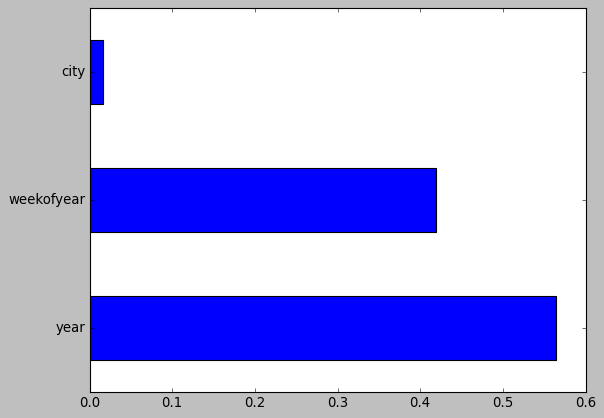

In [142]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 32, random_state = 23)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(model.feature_importances_)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.165,random_state = 40)

feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [143]:
pred

array([1.9468750e+01, 1.7437500e+02, 1.0606250e+02, 6.3968750e+01,
       1.6031250e+01, 5.7500000e+00, 1.9406250e+01, 0.0000000e+00,
       3.4656250e+01, 4.2531250e+01, 1.7750000e+01, 1.0031250e+01,
       5.1875000e+00, 1.7718750e+01, 0.0000000e+00, 9.9687500e+00,
       3.7500000e-01, 2.0218750e+01, 1.8125000e+00, 3.3437500e+00,
       2.5312500e+00, 8.4687500e+00, 5.2500000e+00, 3.1968750e+01,
       7.4375000e+00, 8.2187500e+00, 1.5625000e+00, 3.5031250e+01,
       9.4375000e+00, 2.7281250e+01, 2.9062500e+00, 4.0093750e+01,
       1.4031250e+01, 7.5000000e+00, 4.8437500e+00, 7.9062500e+00,
       1.1406250e+01, 2.6875000e+01, 4.3750000e+00, 2.9718750e+01,
       1.3593750e+01, 2.8718750e+01, 1.1509375e+02, 3.2406250e+01,
       5.8125000e+00, 1.8687500e+01, 8.3437500e+00, 3.7468750e+01,
       8.2875000e+01, 3.1250000e-02, 1.9812500e+01, 1.6843750e+01,
       2.2156250e+01, 5.1250000e+00, 3.9687500e+01, 5.7343750e+01,
       1.1000000e+01, 1.3437500e+01, 7.0312500e+00, 2.0625000e

In [96]:
from sklearn.metrics import r2_score, mean_squared_error

In [97]:
print('MSE = {0:0.2f}'.format(mean_squared_error(y_test,pred)))

MSE = 130.23


In [98]:
print('Accuracy = {0:0.2f}%'.format(r2_score(y_test,pred)))

Accuracy = 0.95%


In [101]:
df1= pd.read_csv('test1.csv')

In [102]:
df1

,city,year,weekofyear
0,sj,1990,18
1,sj,1990,19
2,sj,1990,20
3,sj,1990,21
4,sj,1990,22
...,...,...,...
1451,iq,2010,21
1452,iq,2010,22
1453,iq,2010,23
1454,iq,2010,24


In [117]:
df1.dtypes

city          int64
year          int64
weekofyear    int64
dtype: object

In [105]:
df1['city'] = df1['city'].astype(int)

In [106]:
df1.dtypes

city          int64
year          int64
weekofyear    int64
dtype: object

In [147]:
pred2 = model.predict(df1).round(2)

In [148]:
pred2

array([3.59, 3.59, 3.59, ..., 2.72, 3.91, 5.34])

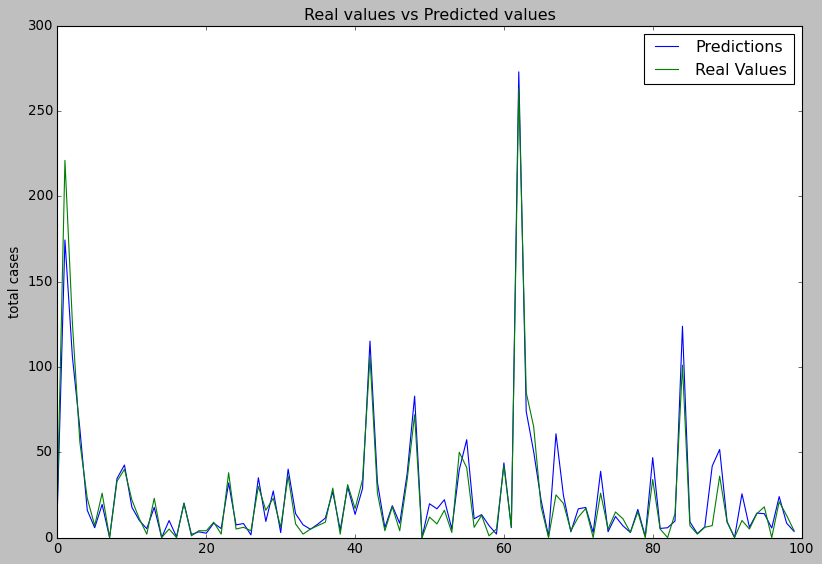

In [149]:
# Saving the model
import pickle
filename = 'lr_modelo.sav'
pickle.dump(model, open(filename,'wb'))

# Loading the model and forecasting with new datasets
# (X_test, Y_test must be new datasets prepared with the proper cleanup and transformation procedure)

load_model = pickle.load(open(filename, 'rb'))
results = load_model.predict(x_test[:100])
plt.figure(figsize=(12,8))

plt.title('Real values vs Predicted values')
plt.ylabel('total cases')
plt.plot(results) #x_test
plt.plot(y_test.values[:100]) #y_test. 100 first values

plt.legend(['Predictions', 'Real Values'])
plt.show()

In [150]:
dengue = pd.DataFrame()
dengue["city"] = df1["city"]
dengue["year"] = df1['year']
dengue["weekofyear"] = df1['weekofyear']
dengue["total_cases"] = pred2

In [151]:
dengue

,city,year,weekofyear,total_cases
0,0,1990,18,3.59
1,0,1990,19,3.59
2,0,1990,20,3.59
3,0,1990,21,3.19
4,0,1990,22,4.91
...,...,...,...,...
1451,1,2010,21,3.19
1452,1,2010,22,4.91
1453,1,2010,23,2.72
1454,1,2010,24,3.91
